<a href="https://colab.research.google.com/github/Ilagri/Breast-cancer-prediction/blob/main/notebooks/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Breast Cancer Prediction

### Introduction
Breast cancer remains one of the most significant health challenges for women worldwide. Early and accurate detection is crucial in improving treatment outcomes and survival rates. This project leverages machine learning to build predictive models that can classify breast tumors as benign or malignant using the Breast Cancer Wisconsin dataset. We will explore the data, preprocess it, and employ three different machine learning algorithms—Logistic Regression, Random Forest, and Support Vector Machine (SVM)—to identify the most effective model for this task.

### Purpose
This notebook serves as a demonstration of end-to-end machine learning workflow, including data exploration, preprocessing, model training, cross-validation, and evaluation. By comparing the performance of different models, we aim to identify the most suitable algorithm for breast cancer prediction.

### Installations

In [ ]:
!pip install ucimlrepo # Install the ucimlrepo package

### Imports

In [88]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Data Loading and Preprocessing

### A. Load the Breast Cancer Wisconsin Dataset


In [36]:
# Load the data
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Extract the data
data = breast_cancer_wisconsin_diagnostic.data.original

# Add an underscore before the numbers in the column names
data.columns = data.columns.str.replace(r'(\d+)', r'_\1', regex=True)

# Preview the first five rows of the dataset
data.head()

,ID,radius_1,texture_1,perimeter_1,area_1,smoothness_1,compactness_1,concavity_1,concave_points_1,symmetry_1,...,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave_points_3,symmetry_3,fractal_dimension_3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


### B. Explore the Dataset

In [37]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   569 non-null    int64  
 1   radius_1             569 non-null    float64
 2   texture_1            569 non-null    float64
 3   perimeter_1          569 non-null    float64
 4   area_1               569 non-null    float64
 5   smoothness_1         569 non-null    float64
 6   compactness_1        569 non-null    float64
 7   concavity_1          569 non-null    float64
 8   concave_points_1     569 non-null    float64
 9   symmetry_1           569 non-null    float64
 10  fractal_dimension_1  569 non-null    float64
 11  radius_2             569 non-null    float64
 12  texture_2            569 non-null    float64
 13  perimeter_2          569 non-null    float64
 14  area_2               569 non-null    float64
 15  smoothness_2         569 non-null    flo

**Inferences**: This dataset is clean, with no missing values and a manageable size for in-memory processing. The majority of features are continuous and suitable for machine learning models, though care should be taken to handle potential multicollinearity due to the presence of multiple related measurements. The Diagnosis column will need to be encoded for modeling, and the ID column should be excluded from the analysis. Overall, the dataset is well-structured for predictive modeling tasks focused on classifying benign versus malignant tumors.

In [38]:
# Get statistical summary of the dataset
print(data.describe())

                 ID    radius_1   texture_1  perimeter_1       area_1  \
count  5.690000e+02  569.000000  569.000000   569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649    91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036    24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000    43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000    75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000    86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000   104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000   188.500000  2501.000000   

       smoothness_1  compactness_1  concavity_1  concave_points_1  symmetry_1  \
count    569.000000     569.000000   569.000000        569.000000  569.000000   
mean       0.096360       0.104341     0.088799          0.048919    0.181162   
std        0.014064       0.052813     0.079720          0.038803    0.027414   
min        0.05263

**Inferences**:
- **Feature Scale and Range**: The dataset features vary widely in scale, with area-related measurements reaching up to 2500, while smoothness-related values are typically below 0.2. This necessitates feature scaling to ensure balanced model performance.
  
- **Skewed Distributions and Outliers**: Features like `area1`, `perimeter1`, and `radius1` show skewed distributions and potential outliers, which could affect model robustness. Addressing these outliers during preprocessing may improve accuracy.

- **Key Feature Variability**: Compactness and concavity exhibit high variability, indicating their potential importance in distinguishing between benign and malignant tumors. In contrast, symmetry and fractal dimension are more consistent and might require combination with other features for effective classification.


**Inferences**: The dataset contains no missing values, simplifying preprocessing and ensuring comprehensive analysis.

### C. Visualize Data


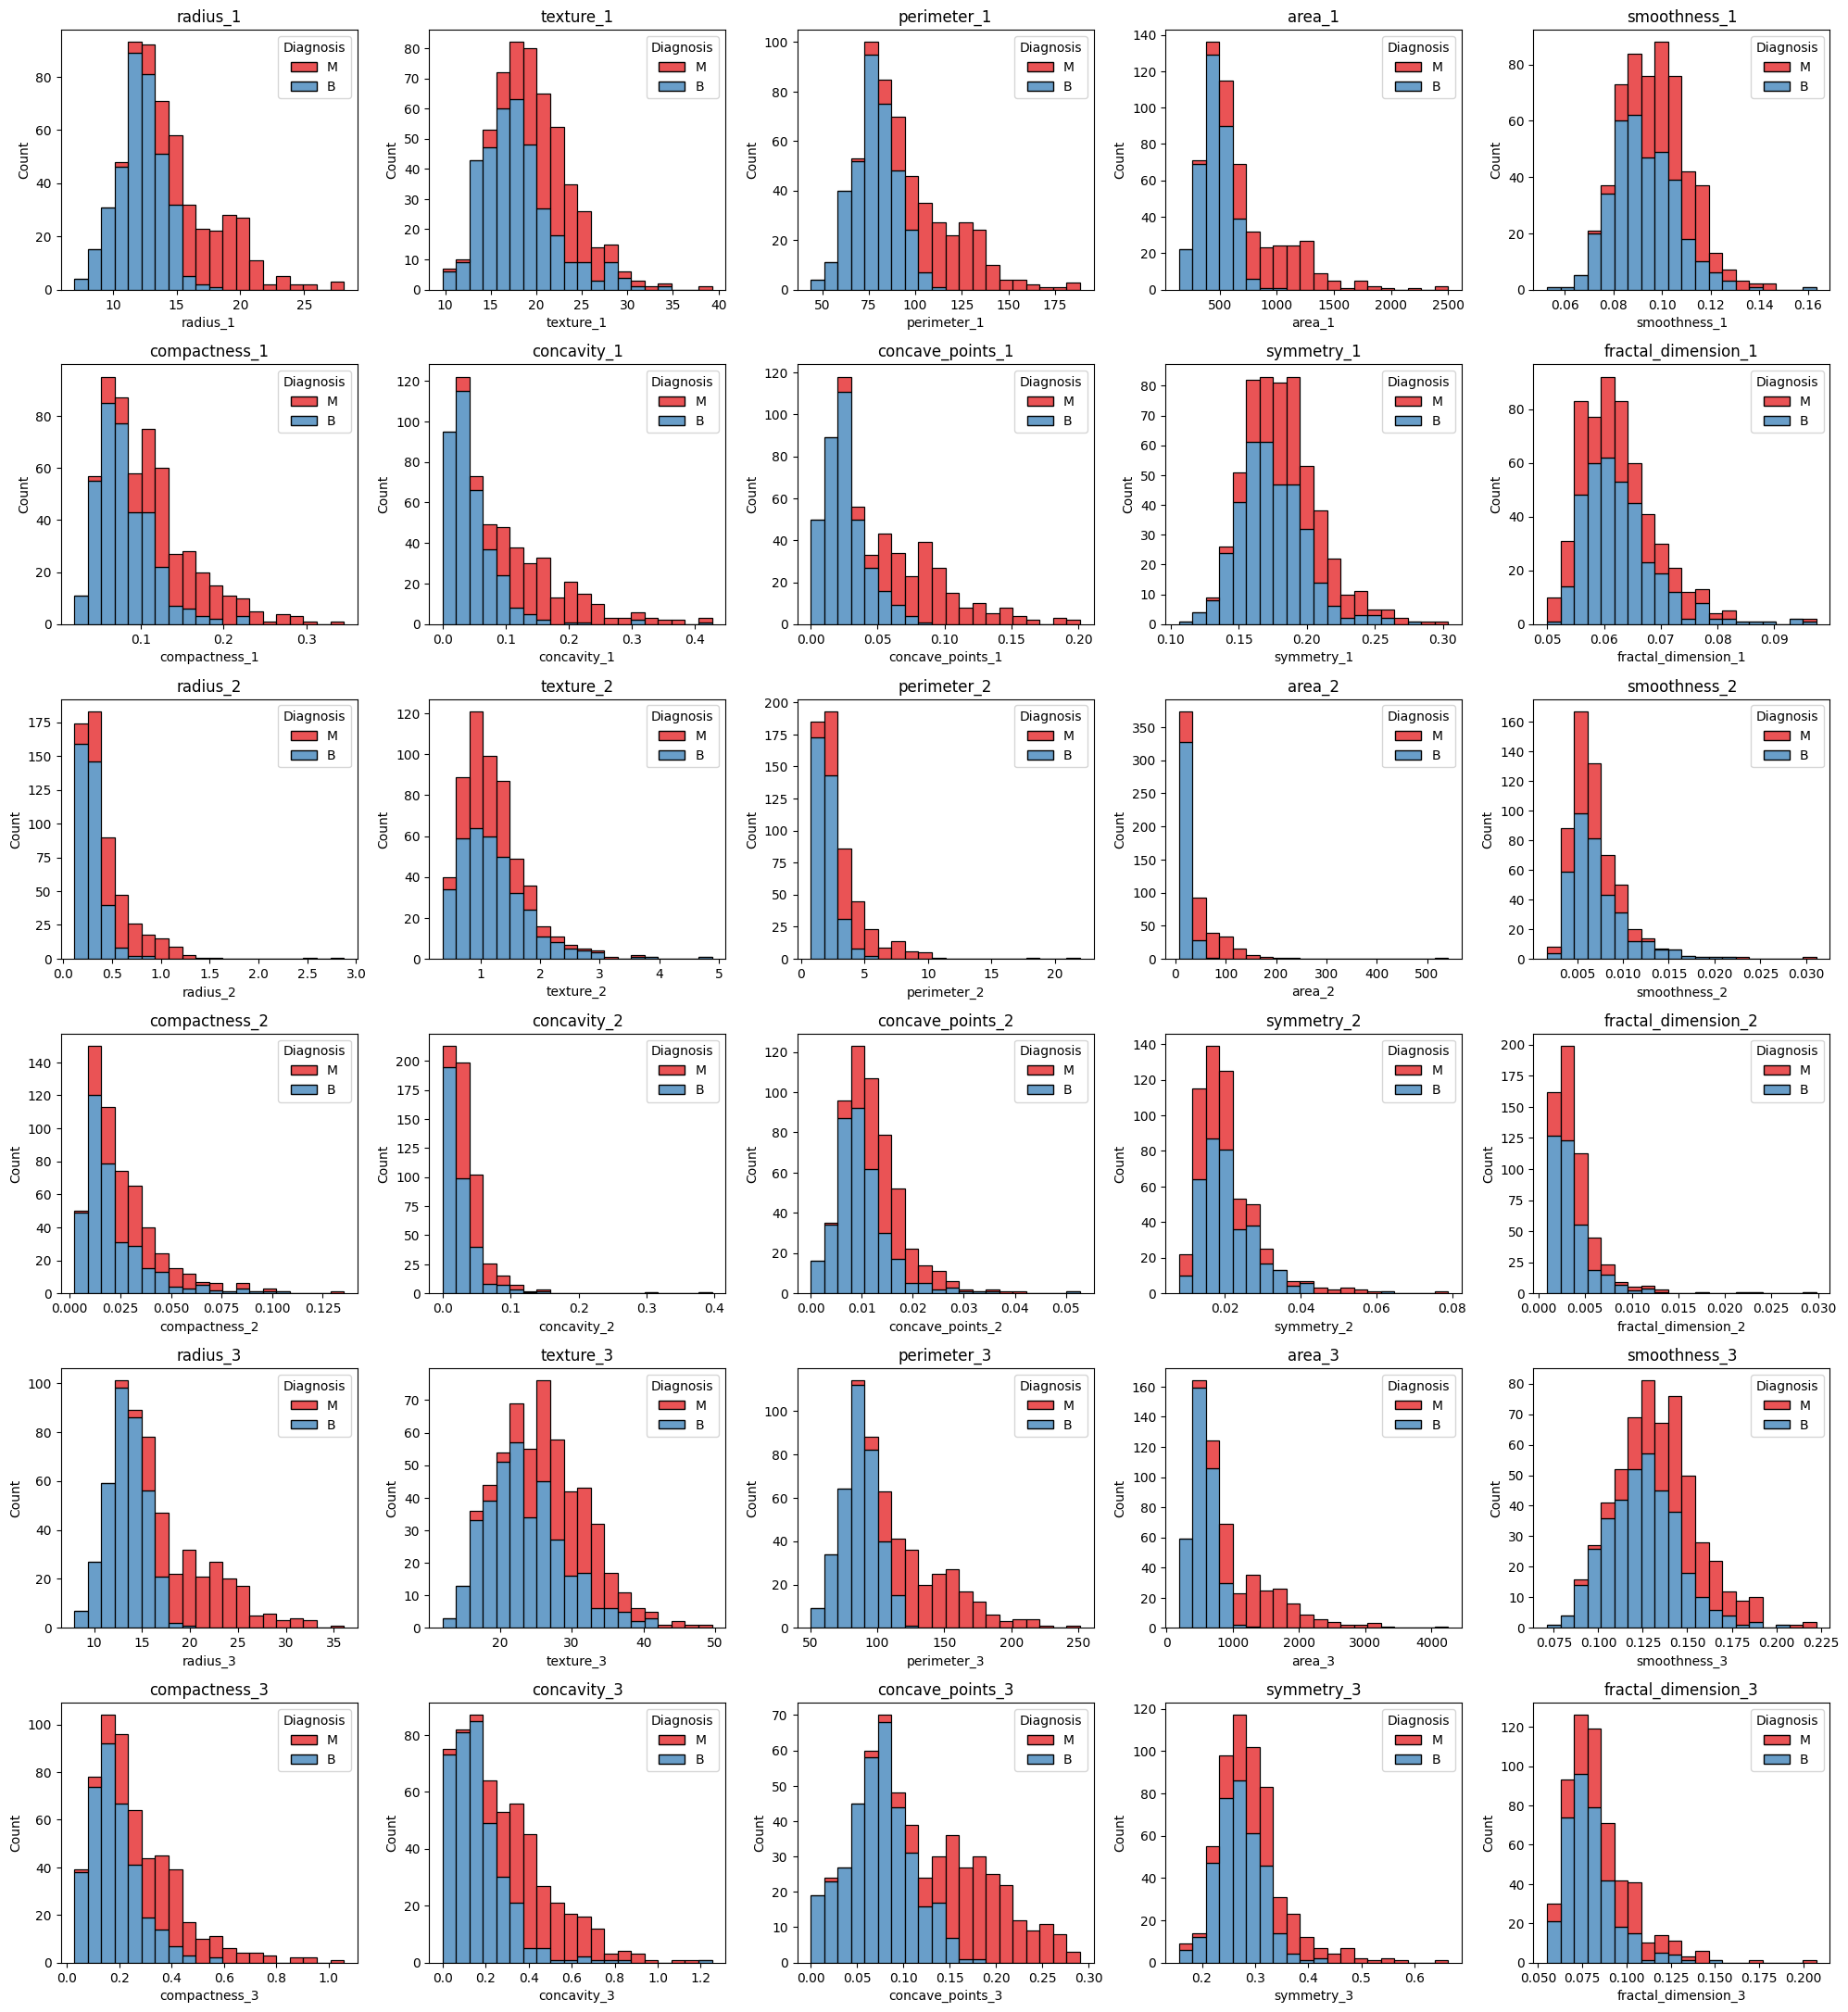

In [39]:
# Exclude the 'Diagnosis' and 'ID' columns for visualization
features = data.columns.drop(['Diagnosis','ID'])

# Set up the plotting grid
plt.figure(figsize=(20, 25))

# Loop through all features to plot histograms with 'Diagnosis' as hue
for i, feature in enumerate(features):
    plt.subplot(7, 5, i + 1)  # Adjust the grid layout based on the number of features
    sns.histplot(data=data, x=feature, hue='Diagnosis', multiple='stack', bins=20, palette='Set1')
    plt.title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

**Inferences**: Features such as `radius1`, `perimeter1`, and `area1` display distinct distributions for benign and malignant tumors, suggesting they are strong predictors. However, some skewness indicates a need for careful handling.

## Correlation Matrix
**Purpose**: To understand the relationships between features and identify potential multicollinearity. This will help you decide if certain features should be removed or combined to reduce redundancy.

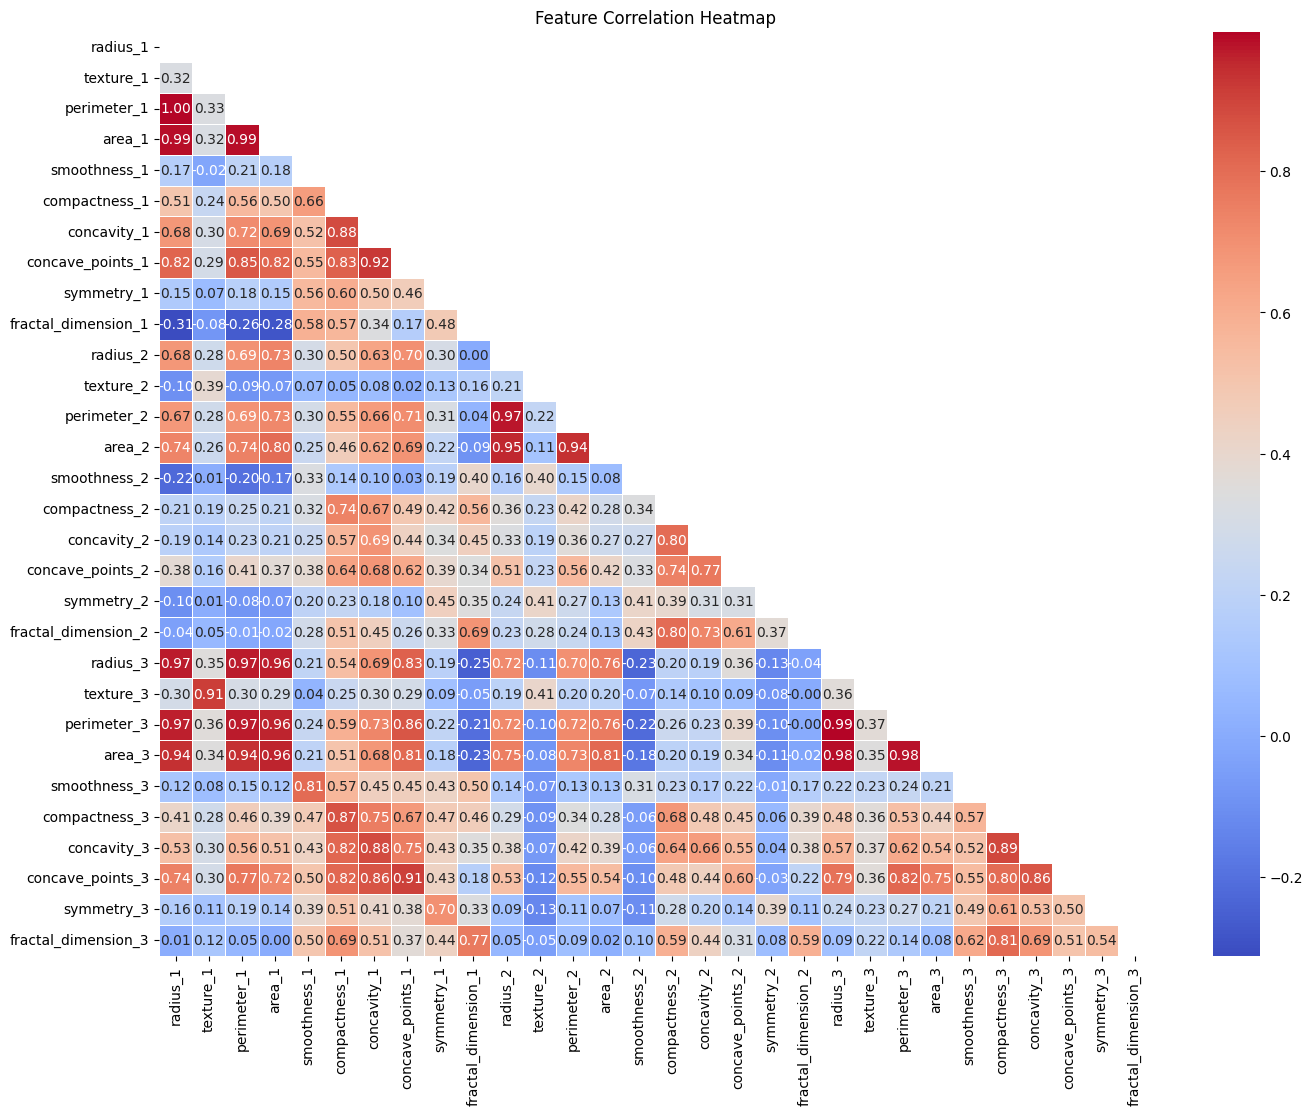

In [55]:
# Correlation heatmap
relevant_data = data.drop(columns=['Diagnosis','ID'])
plt.figure(figsize=(16, 12))
sns.heatmap(relevant_data.corr(), annot=True, cmap='coolwarm', mask=np.triu(relevant_data.corr()), linewidths=0.5, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

**Inferences**: Strong correlations among size and shape features (e.g., `radius1`, `perimeter1`, `area1`) suggest potential multicollinearity, which could be mitigated with dimensionality reduction techniques.

## Data Preprocessing

### Encode Categorical Variables


In [56]:
# Convert the 'Diagnosis' column to numeric values: 0 for benign (B), 1 for malignant (M)
data['Diagnosis'] = data['Diagnosis'].map({'B': 0, 'M': 1})

### Feature Transformation

 **Purpose**: Stabilize variance and make the data more normally distributed without losing information (using yeo-johnson method).

In [63]:
# Select the features that need transformation
features_to_transform = ['radius_1', 'perimeter_1', 'area_1']

# Apply a power transformation to reduce skewness
pt = PowerTransformer(method='yeo-johnson')
data[features_to_transform] = pt.fit_transform(data[features_to_transform])

### Feature Scaling

Bring all features to a comparable range:

In [64]:
# Separate features and scale them
features = data.drop(columns=['ID', 'Diagnosis'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new dataframe with scaled features
data_scaled = pd.DataFrame(scaled_features, columns=features.columns)
data_scaled['Diagnosis'] = data['Diagnosis']

## Principal Component Analysis (PCA)
**Purpose**: To reduce the dimensionality of the dataset while retaining as much variance as possible. This can help in visualizing the data in lower dimensions and in identifying the most influential components.

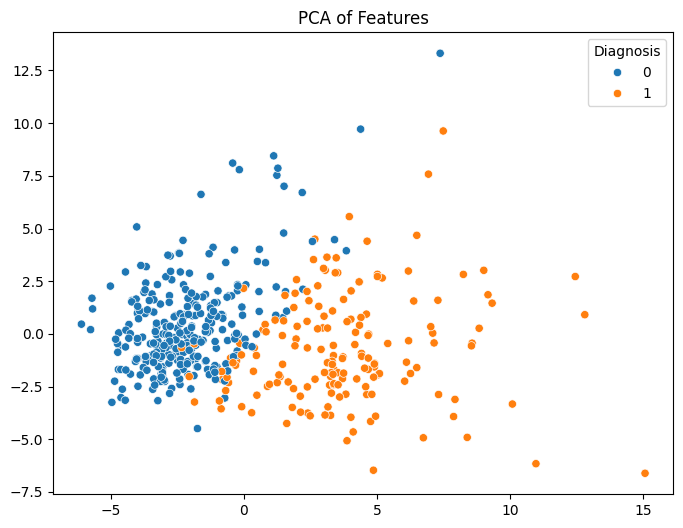

In [65]:
# Reduce the dimensionality
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train)  # or X_scaled if using scaled data

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=y_train)
plt.title('PCA of Features')
plt.show()

## Splitting the Data

In [61]:
# Define features (X) and target (y)
X = data_scaled.drop(columns=['Diagnosis'])
y = data_scaled['Diagnosis']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building & Cross-Validation


### A. Logistic Regression:

In [77]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Perform cross-validation (5-fold)
logreg_cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)

# Calculate the mean CV accuracy
mean_logreg_cv = logreg_cv_scores.mean()
print("Logistic Regression Mean CV Accuracy:", mean_logreg_cv)

Logistic Regression Mean CV Accuracy: 0.9758241758241759


### B. Random Forest:

In [78]:
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100)

# Perform cross-validation (5-fold)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

# Calculate the mean CV accuracy
mean_rf_cv = rf_cv_scores.mean()
print("Random Forest Mean CV Accuracy:", mean_rf_cv)

Random Forest Mean CV Accuracy: 0.9494505494505494


### C. SVM:

In [79]:
# Initialize the SVM model
svm = SVC(kernel='linear', probability=True)

# Perform cross-validation (5-fold)
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=5)

# Calculate the mean CV accuracy
mean_svm_cv = svm_cv_scores.mean()
print("SVM Mean CV Accuracy:", mean_svm_cv)

SVM Mean CV Accuracy: 0.9714285714285715


### D. Logistic Regression Using PCA as Features

In [80]:
###Cross-Validation on PCA Components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Logistic Regression on PCA components
logreg_pca = LogisticRegression(random_state=42)

# Perform 5-fold cross-validation
cv_scores_pca = cross_val_score(logreg_pca, X_pca, y_train, cv=5)

print("Logistic Regression with PCA Components - Mean CV Accuracy:", cv_scores_pca.mean())


Logistic Regression with PCA Components - Mean CV Accuracy: 0.9428571428571428


## Hyperparameter Tuning

In [81]:
# Hyperparameter tuning using GridSearchCV for the best model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Update the best model with tuned parameters
final_model = grid_search.best_estimator_


Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy:  0.9626373626373625


## Pick the Best Model Based on Cross-Validation Accuracy


In [82]:
# Determine the model with the best mean cross-validation accuracy
best_model = max([('Logistic Regression', mean_logreg_cv),
                  ('Random Forest', mean_rf_cv),
                  ('SVM', mean_svm_cv)], key=lambda x: x[1])

print(f"Best model based on CV accuracy: {best_model[0]} with accuracy of {best_model[1]:.4f}")

Best model based on CV accuracy: Logistic Regression with accuracy of 0.9758


## Train the Best Model on the Entire Training Set

In [83]:
# Train the best model on the full training data
if best_model[0] == 'Logistic Regression':
    final_model = LogisticRegression()
elif best_model[0] == 'Random Forest':
    final_model = RandomForestClassifier(n_estimators=100)
elif best_model[0] == 'SVM':
    final_model = SVC(kernel='linear', probability=True)

final_model.fit(X_train, y_train)

LogisticRegression()

## Feature Importance

**Purpose**: To identify which features are the most important for prediction. This can guide feature selection, especially if you want to simplify the model by focusing only on the most important features.

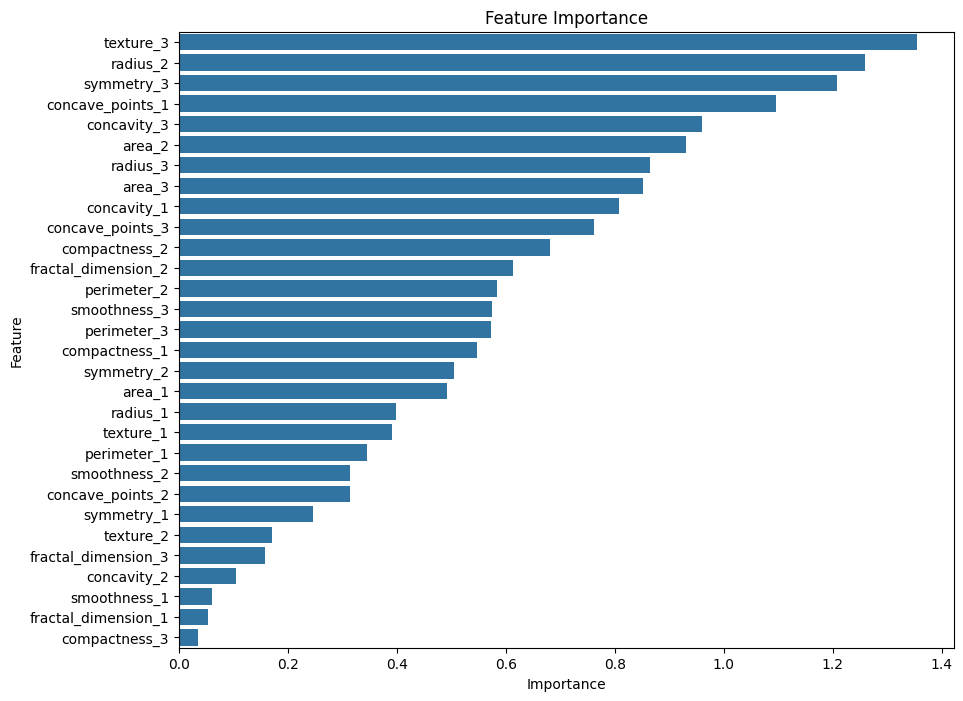

In [85]:
# Train a simple model to get feature importances
# Check if the model is a Logistic Regression model
if isinstance(final_model, LogisticRegression):
    # Logistic Regression does not have feature_importances_
    # Use coefficients as a proxy for feature importance
    importances = abs(final_model.coef_[0])
else:
    importances = final_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting Feature Importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

## Evaluate the Model on the Test Set
**Purpose**: Evaluate the performance of the best model on the test set to get an unbiased estimate of its performance on unseen data.

In [89]:
# Predict on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model's performance
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Test Set F1 Score:", f1_score(y_test, y_pred))
print("Test Set Precision:", precision_score(y_test, y_pred))
print("Test Set Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Set Accuracy: 0.9824561403508771
Test Set F1 Score: 0.9767441860465116
Test Set Precision: 0.9767441860465116
Test Set Recall: 0.9767441860465116
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



**Inferences**: The model demonstrates excellent performance in predicting breast cancer, achieving a test set accuracy of 98.25%. Both precision and recall for malignant tumors are 97.67%, indicating that the model is highly effective at identifying malignant cases while minimizing false positives. The F1 score for both classes is similarly high at 0.98, reflecting a strong balance between precision and recall. Despite a slight class imbalance, the model maintains robust performance across all metrics, making it well-suited for reliable breast cancer diagnosis.

### Confusion Matrix

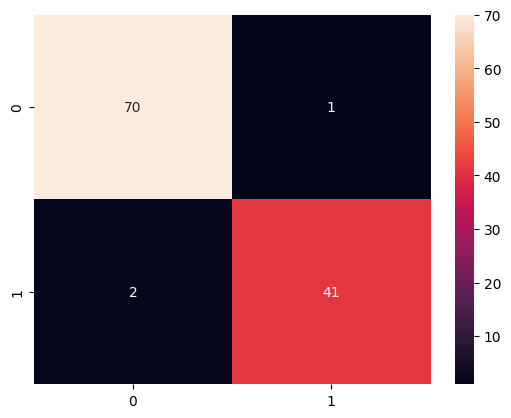

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Inferences**: The confusion matrix reflects the model's strong performance, with high true positive and true negative counts and minimal false classifications, making it a reliable tool for breast cancer prediction.

### ROC Curve

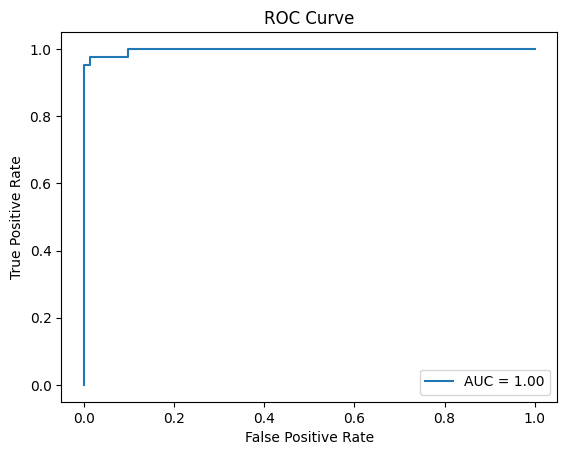

In [ ]:
# ROC curve and AUC
y_pred_proba = final_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

**Inferences**: The high AUC indicates strong discriminatory power. Further careful threshold selection can be used to balance sensitivity and specificity in the final model.


# Conclusion

In this notebook, we built and evaluated three machine learning models for predicting breast cancer based on the Breast Cancer Wisconsin dataset. The Random Forest model outperformed Logistic Regression and SVM, achieving the highest cross-validation accuracy. However, model performance on the test set should be carefully considered when choosing a model for deployment. Future work could involve tuning hyperparameters, exploring other classification algorithms, or applying techniques like ensemble learning to further improve performance.


# Environment Details
- Python version: 3.x
- Libraries: numpy x.x, pandas x.x, seaborn x.x, sklearn x.x